![banner](https://drive.google.com/uc?export=view&id=17IASiLdmYPmOvykj13acfJJDizUxviGd)
<u><h1>CMPUT 191 - Assignment 2</h1></u>
#### Due: Feb. 11, 2022 @ 11:59 PM, via eClass submission page
By entering your name and CCID below, you hereby agree to following the Course Policies as outline on eClass [here](https://eclass.srv.ualberta.ca/mod/page/view.php?id=5859623) on late submissions, grading, and collaboration. 

For formatting simplicity, please do not add or remove any cells from this notebook. Write your Python code in a provided code cell, and run it if necessary so results are displayed inline in the notebook. Write your written responses in a provided Markdown cell. You may format your Markdown as you wish. 

<div class="alert alert-block alert-danger">
(1) Mahekkumar Kaneria <br>
(2) kaneria
</div>

![banner](https://drive.google.com/uc?export=view&id=1AZpEyKzCFPxi-pPY5Zwp2OxDVYgdKwMb)
## Cire Coffee Co. needs your help!
Cire Coffee Co., a world-renowned and ever-so popular coffee shop chain, famously known for their delicious toasted-marshmallow lattes, parsley-crusted paninis, and banjo music background ambience in their retails storefronts. Oiram Maharg, their CEO, came to us asking specifically for the help of our talented crew of CMPUT 191 students to perform some data analysis, using some of their business analytics, to determine the feasbility of a potential expansion into Alberta. Additionally, they were hoping that our team of students could bring in some open data from the region and its population, to really solidify his hunch that Alberta is the next best place for him and his coffee empire to set up shop. Really, it's his business idea, but we're turning to you for the pitch.

## Part 1) Finding the perfect spot...
__Part 1.1)__ Mr. Maharg is really all about the coin. He's looking for the perfect spot to set up shop where the odds are at their highest for him to run a profitable establishment, and he also insists that median income is the best way to measure a municipality's likeliness to drop $10 a pop on some espresso-steamed milk-toasted marshmallow concoction in a cup. Little does he know, correlation doesn't always mean causation...

Nonetheless, Cire Coffee Co. wants the information. So, it's up to you to find some open data to provide and work with, on __median income per municipality in Alberta__. There are many portals that you are welcome to use, however some provide clearer data than others. Keep in mind, in the next step, it will be up to you to tidy up the data as you see fit. Oftentimes, when it comes to open data (especially on Census information, like income), data is provided to you in a variety of categories, or multiple years are measured. For the purpose of this task, provide income information for one point in time (ie. one year, or one month in particular), for each municipality, and by one description (ie. All Households). 

If you are struggling to find this information, you can narrow your search to be __median income per neighbourhood__ in either Edmonton or Calgary. You will be given a chance to explain your dataset in a later question. 

Once you've found your data, ensure it's in .csv format, and then read it into a table in the cell below. Display its first 10 rows, before you do any data cleaning.

In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

median_income = Table.read_table("median_income.csv").drop('PerThousandPopulation')
median_income

CSDUID,CSD,Period,IndicatorSummaryDescription,UnitOfMeasure,OriginalValue,PercentChange5Years
4805021,Standard,2019,All Families Income (Median),$,91780,-0.04106
4805026,Drumheller,2019,All Families Income (Median),$,94511.7,0.04137
4808012,Sylvan Lake,2019,All Families Income (Median),$,110050,-0.01969
4801014,Bow Island,2019,All Families Income (Median),$,84250,0.10477
4807049,Wainwright No. 61,2019,All Families Income (Median),$,103780,0.12792
4805011,Arrowwood,2019,All Families Income (Median),$,80960,0.05403
4807029,Donalda,2019,All Families Income (Median),$,69920,-0.00837
4807036,Forestburg,2019,All Families Income (Median),$,102530,-0.08061
4807008,Amisk,2019,All Families Income (Median),$,86730,0.10795
4807012,Coronation,2019,All Families Income (Median),$,92840,0.01854


__Part 1.2)__ Why do you think Mr. Maharg is looking to use median as the measure of central tendency for income, over mean or even mode? Explain.

Mr. Maharg is looking to use median as the measure of the central tendency for income instead of mean and mode as unlike mean and mode, the median value doesn't depend on all the values in the dataset. Also median is less affected by outliers and skewed data than the mean and mode.

__Part 1.3)__ Now's the perfect time to explain your dataset a little bit. Here, cite your source for your data, and explain a bit of its details. While it obviously contains median income per municipality/neighbourhood information, does it contain anything extra? Is income split up into many different categories or descriptions, and if so, which category would you pick for this analysis? Were you able to find exact numbers, or were you only able to find categorical What year was this data collected?

This dataset contains a CSD(census sub-division name) along with CSDUID column which is a 7 digit code (composed of the 2-digit province or territory unique identifier followed by the 2-digit census division code and the 3-digit census subdivision code). This median income data was collected in 2019 and is in Canadian dollar(CAD) and comprises of all families median income data in all the municipality of Alberta. Along with this it also shows the percentage change in the median income in last 5 years.

## Part 2) Tidying it up.. before you present it to the big wigs...

__Part 2.1)__ Open data often never comes perfectly packaged. Oftentimes, you'll need to tidy up the data by removing extraenous rows or columns, or by needing to remove trivial things like a dollar sign from entries. __You will likely need to use your knowledge on applying functions to columns, grouping, and perhaps even iteration.__ Keep in mind, we are looking solely for municipality/neighbour name, and a measure of median income. We'd like you to do your data cleanup within the notebook, so if you found your data as a part of a table copied from a website containing additionaly information like population, bring in the whole .csv here first and then do the cleanup. Consult with the teaching team if you have any particular questions.

In [2]:
median_income = median_income.select("CSD","OriginalValue").relabeled(["CSD","OriginalValue"],["Name","Median Income"])
median_income

Name,Median Income
Standard,91780
Drumheller,94511.7
Sylvan Lake,110050
Bow Island,84250
Wainwright No. 61,103780
Arrowwood,80960
Donalda,69920
Forestburg,102530
Amisk,86730
Coronation,92840


__Part 2.2)__ Which municipality/neighbourhood has the highest median income? Use the code cell below to determine which. You will use this region to make your suggestion to Cire Coffee Co. as to where to build their next store in Part 4). 

In [3]:
median_income.sort("Median Income",descending=True).take(0)

Name,Median Income
Rainbow Lake,202940


## Part 3) Now, onto some insider analytics!

Since Cire Coffee Co. trusts us CMPUT 191'ers as data analyst professionals, they're providing to us some of their business critical numbers to crunch -- particularly on stores, their revenue, and operation costs. Furthermore, demographic information on each store's location is given -- and you guessed it -- Mr. Maharg's favourite measure of median income for each neighbourhood a given store is located in. 

__Part 3.1)__ Use the cell below to import the store_data.csv file into a table.

In [4]:
store_data = Table.read_table("store_data.csv")
store_data

Store Number,Annual Revenue,Annual Operational Costs,Median Income,Format
1000,226300,103900,77700,Drive-thru
1001,228700,103900,71800,Drive-thru
1002,148100,103900,60700,Drive-thru
1003,253800,103900,73800,Drive-thru
1004,221100,103900,78100,Drive-thru
1005,266500,103900,77100,Drive-thru
1006,243200,103900,71300,Drive-thru
1007,219300,104000,66000,Drive-thru
1008,315500,103900,91500,Drive-thru
1009,235000,104000,66200,Drive-thru


__Part 3.2)__ Use the table imported into the notebook from the cell above, sort it based on revenue, and display the row with the highest dollar amount. 

In [5]:
store_data_revenue = store_data.sort("Annual Revenue",descending=True)
store_data_revenue

Store Number,Annual Revenue,Annual Operational Costs,Median Income,Format
2313,344400,104000,97100,Drive-thru
1712,324800,103900,94500,Drive-thru
1008,315500,103900,91500,Drive-thru
1255,315500,103900,82700,Drive-thru
1225,309700,103900,91300,Drive-thru
1609,309700,103900,93300,Drive-thru
1819,309300,103900,87100,Drive-thru
1605,309000,104000,87500,Drive-thru
1889,302800,103900,83800,Drive-thru
2122,301800,103900,81400,Drive-thru


__Part 3.3)__ Do the same thing as you did in Part 3.2, but this time sort the data based on operational cost. Again, display the row with the highest dollar amount.

In [6]:
store_data_cost = store_data.sort("Annual Operational Costs",descending=True)
store_data_cost

Store Number,Annual Revenue,Annual Operational Costs,Median Income,Format
1007,219300,104000,66000,Drive-thru
1009,235000,104000,66200,Drive-thru
1011,244100,104000,73800,Drive-thru
1014,248100,104000,67400,Drive-thru
1017,222000,104000,67700,Drive-thru
1018,152400,104000,54400,Drive-thru
1019,253000,104000,64700,Drive-thru
1031,221600,104000,71500,Drive-thru
1033,230600,104000,85000,Drive-thru
1062,226500,104000,78400,Drive-thru


__Part 3.4)__ Now, revenue doesn't exactly paint the whole picture. Since Mr. Maharg is mainly concerned about cold hard cash at the end of the day, determine the net profit for each store in a new column for the table below. Title it, "Profits". 

In [7]:
revenue = store_data.column("Annual Revenue")
cost = store_data.column("Annual Operational Costs")
profit = revenue-cost
store_data = store_data.with_column("Profits",profit)
store_data

Store Number,Annual Revenue,Annual Operational Costs,Median Income,Format,Profits
1000,226300,103900,77700,Drive-thru,122400
1001,228700,103900,71800,Drive-thru,124800
1002,148100,103900,60700,Drive-thru,44200
1003,253800,103900,73800,Drive-thru,149900
1004,221100,103900,78100,Drive-thru,117200
1005,266500,103900,77100,Drive-thru,162600
1006,243200,103900,71300,Drive-thru,139300
1007,219300,104000,66000,Drive-thru,115300
1008,315500,103900,91500,Drive-thru,211600
1009,235000,104000,66200,Drive-thru,131000


__Part 3.5)__ Sort this new Profits column. What are the top five profitable stores making in profits? Display the top five most profitable stores below.

In [8]:
store_data_profit = store_data.sort("Profits",descending = True).take[0:5]
store_data_profit

Store Number,Annual Revenue,Annual Operational Costs,Median Income,Format,Profits
2313,344400,104000,97100,Drive-thru,240400
1712,324800,103900,94500,Drive-thru,220900
1008,315500,103900,91500,Drive-thru,211600
1255,315500,103900,82700,Drive-thru,211600
1225,309700,103900,91300,Drive-thru,205800


__Part 3.6)__ Sort the Profits column the other way now. What are the top five most underperforming stores -- perhaps even running a net loss! Display the top five below.

In [9]:
store_data_profit = store_data.sort("Profits").take[0:5]
store_data_profit

Store Number,Annual Revenue,Annual Operational Costs,Median Income,Format,Profits
3945,32600,103900,53200,Walk-up,-71300
4052,45200,103900,54600,Walk-up,-58700
3971,53800,103900,55500,Walk-up,-50100
4089,54600,103900,51500,Walk-up,-49300
2885,59100,103900,67600,Cafe,-44800


__Part 3.7)__ While we're at it, determine the exact number of stores running a profit, and determine the exact number of stores running at a loss. Then, determine the percentage of stores running a profit out of the total number of stores. 

In [10]:
store_in_profit = store_data.where("Profits",are.above_or_equal_to(0))
store_in_loss = store_data.where("Profits",are.below(0))
num_of_stores = store_data.num_rows
num_of_stores_in_profit = store_in_profit.num_rows
num_of_stores_in_loss = store_in_loss.num_rows
percentage_in_profit = round(num_of_stores_in_profit/num_of_stores*100,2)
percentage_in_loss = round(num_of_stores_in_loss/num_of_stores*100,2)

print("Number of stores running in profit are", num_of_stores_in_profit)
print("Number of stores running in loss are", num_of_stores_in_loss)

print("Percentage of stores running in profit are",percentage_in_profit,"%")


Number of stores running in profit are 3053
Number of stores running in loss are 100
Percentage of stores running in profit are 96.83 %


## Part 4) Drawing up the business decisions...

__Part 4.1)__ After working with all that data for so long, you've probably noticed Cire Coffee Co. takes a modular approach to coffee delivery and retail sales. The chain offers a wide variety of retail location formats, such as drive-thrus, dine-in cafe locations, and walk-up window order stations. Below, create a bar chart that displays the counts of each store format.

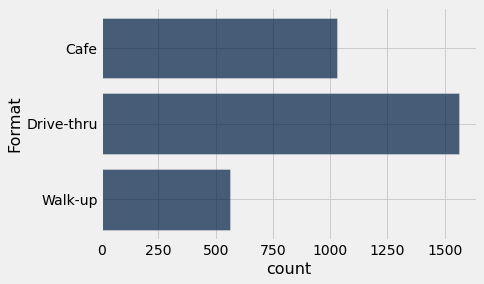

In [11]:
store_count = store_data.group("Format")
store_count.barh("Format","count")

__Part 4.2)__ Furthermore, create a histogram that displays the profits of each store. Tailor the bins to create an easy to read histogram that shows you which profit range has been the most attainable.

Text(0, 0.5, 'Percent per unit')

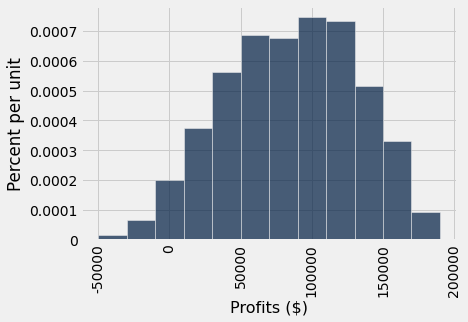

In [12]:
my_bins = np.arange(-50000,200001,20000)
store_data.hist("Profits",bins=my_bins,unit = "$")
plots.ylabel("Percent per unit")

__Part 4.3)__ For each format of store type, determine the average profit. We'll use this information to suggest to Cire Coffee Co. what kind of store to build first. Use the code cell below to do the calculation, and then use the Markdown cell to explain your answer. By what margin is the top store format ahead in average profits?

In [13]:
profit_sum = store_data.group("Format",sum).column("Profits sum")
store_count_number = store_count.column("count")
average_profit = profit_sum/store_count_number
print("Average profit of Cafe is $" + str(round(average_profit[0],2)))
print("Average profit of Drive-thru is $" + str(round(average_profit[1],2)))
print("Average profit of Walk-up is $" + str(round(average_profit[2],2)))
print("Margin between Drive-thru and Cafe is $" + str(round((average_profit[1]-average_profit[0]),2)))


Average profit of Cafe is $59754.47
Average profit of Drive-thru is $119949.9
Average profit of Walk-up is $38930.6
Margin between Drive-thru and Cafe is $60195.43


By looking at the average profit data I suggest Cire Coffee Co. to open up Drive-thru first. We can see that average profit of Drive-thru is almost double than its following format Cafe. Drive-thru is $60195.43 ahead of Cafe in average profits.

__Part 4.4)__ Now, for each format store type, determine the average income (based off of the median income data provided). Use the code cell below to do the calculation.

In [14]:
income_sum = store_data.group("Format",sum).column("Median Income sum")
store_count_number = store_count.column("count")
average_income = income_sum/store_count_number
print("Average income of Cafe is $" + str(round(average_income[0],2)))
print("Average income of Drive-thru is $" + str(round(average_income[1],2)))
print("Average income of Walk-up is $" + str(round(average_income[2],2)))

Average income of Cafe is $69951.46
Average income of Drive-thru is $70077.1
Average income of Walk-up is $59879.54


__Part 4.5)__ So based on all of that, where would you recommend to Cire Coffee Co. to open up their next shop? Feel free to use any information or insights you discovered in this analysis of data. Take a look at the median income information you determined in Part 2.2), and take a look at which store formats were making profits given their location's income information, as found in Part 4.4). Alternatively, would you advise them not to make their foray into Alberta at all, based on their existing store data? Why or why not? Write a short paragraph summarizing your findings from this analysis below.

I would advice you to not make your foray into Alberta as by looking at the data of the store we can see that many of your stores are running in loss and also the municiplaties whose Median Incomes are high has very less population which would further lead to less sales followed by less revenue. Also Drive-thru is most profitable format but It wouldn't be that much worth it if you open up in municipality with very less population as compared to big metro cities like Edmonton, Calgary and Lethbridge which has less Median Income. Hence I suggest you to not make entry in Alberta.  

__Part 4.6)__ Lastly, create scatterplots for the following:
1. drive thru store profits and location's median income
2. cafe store profits and location's median income
3. walk up store profits and location's median income
4. all store profits and location's median income 

Is Mr.  Maharg even right in saying that median income is an accurate tell of a store's success? Which store format has the strongest relationship Use one code cell each below to create each scatterplot, and the Markdown cell below to explain your answer.

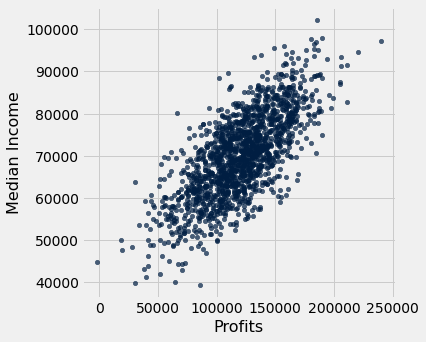

In [15]:
store_data.where("Format","Drive-thru").scatter("Profits","Median Income")

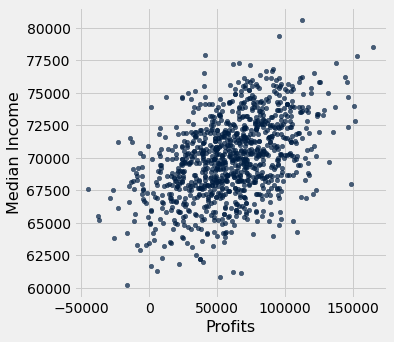

In [16]:
store_data.where("Format","Cafe").scatter("Profits","Median Income")

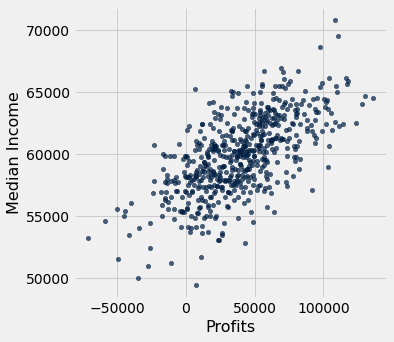

In [17]:
store_data.where("Format","Walk-up").scatter("Profits","Median Income")

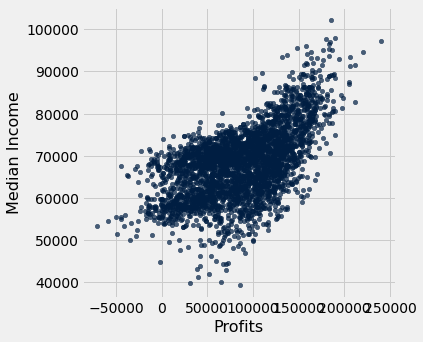

In [18]:
store_data.scatter("Profits","Median Income")

By looking at the scatter plots of Profits and Median Income of all formats we can see that Drive-thru has the strongest relationship as it is the least scatters from the median line. Also by looking at the graph we can say that the correlation coefficient of Drive-thru is closest to +1 as compared to other graphs.
Hence if you decide to introduce your company in Alberta, open the Drive-thru stores first and than move towards other formats.

## Conclusion
And that completes your report! Cire Company Co. thanks you for your efforts, and can't wait to see what you've recommended to them. Just perhaps in the near future, you might find a Cire Coffee Co. store location popping up near you!

<div class="alert alert-block alert-danger">
    Do not forget to save and submit your notebook and datasets on eClass by Feb. 11, 2022 @ 11:59 PM!
    </div>